In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\saras\\Desktop\\Kaggle_datsets\\water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.shape

(3276, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [44]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [9]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

0    1998
1    1278
Name: Potability, dtype: int64


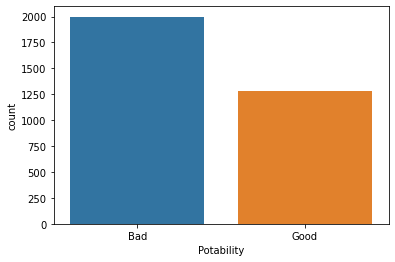

In [10]:
#Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
print(df['Potability'].value_counts())
sns.countplot(x='Potability',data=df)
plt.xticks(ticks=[0,1],labels=['Bad','Good'])
plt.show()

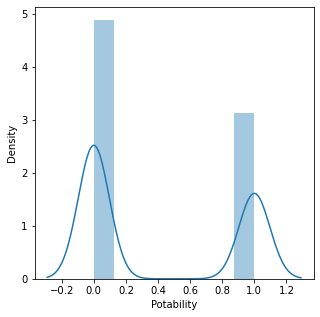

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(df['Potability'])
plt.show()

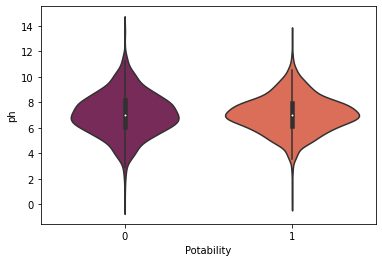

In [12]:
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')
plt.show()

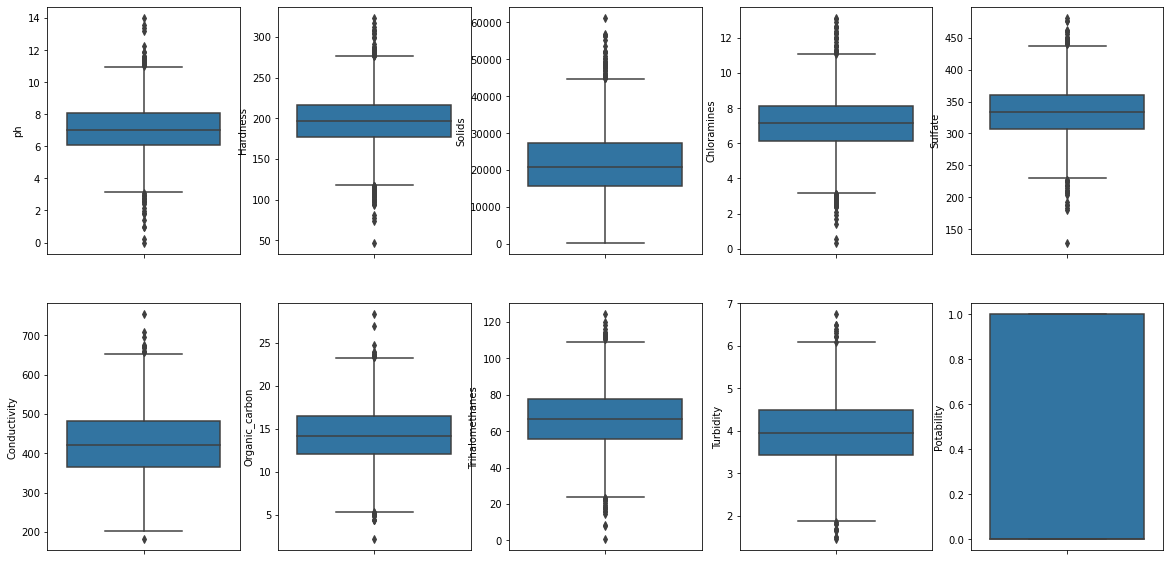

In [13]:
fig=plt.figure(figsize=(20, 10))
ax = fig.subplots(ncols=5, nrows=2)
ax = ax.flatten()

index = 0
for i in df.columns:
    sns.boxplot(y=i, data=df, ax=ax[index])
    index = index + 1
plt.show()

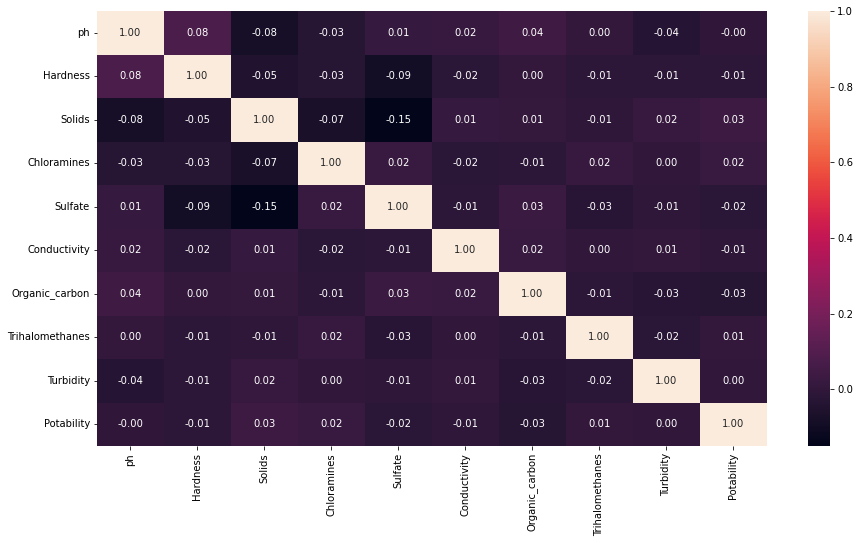

In [29]:
fig=plt.figure(figsize=(15, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")
plt.show()

<Figure size 2160x2160 with 0 Axes>

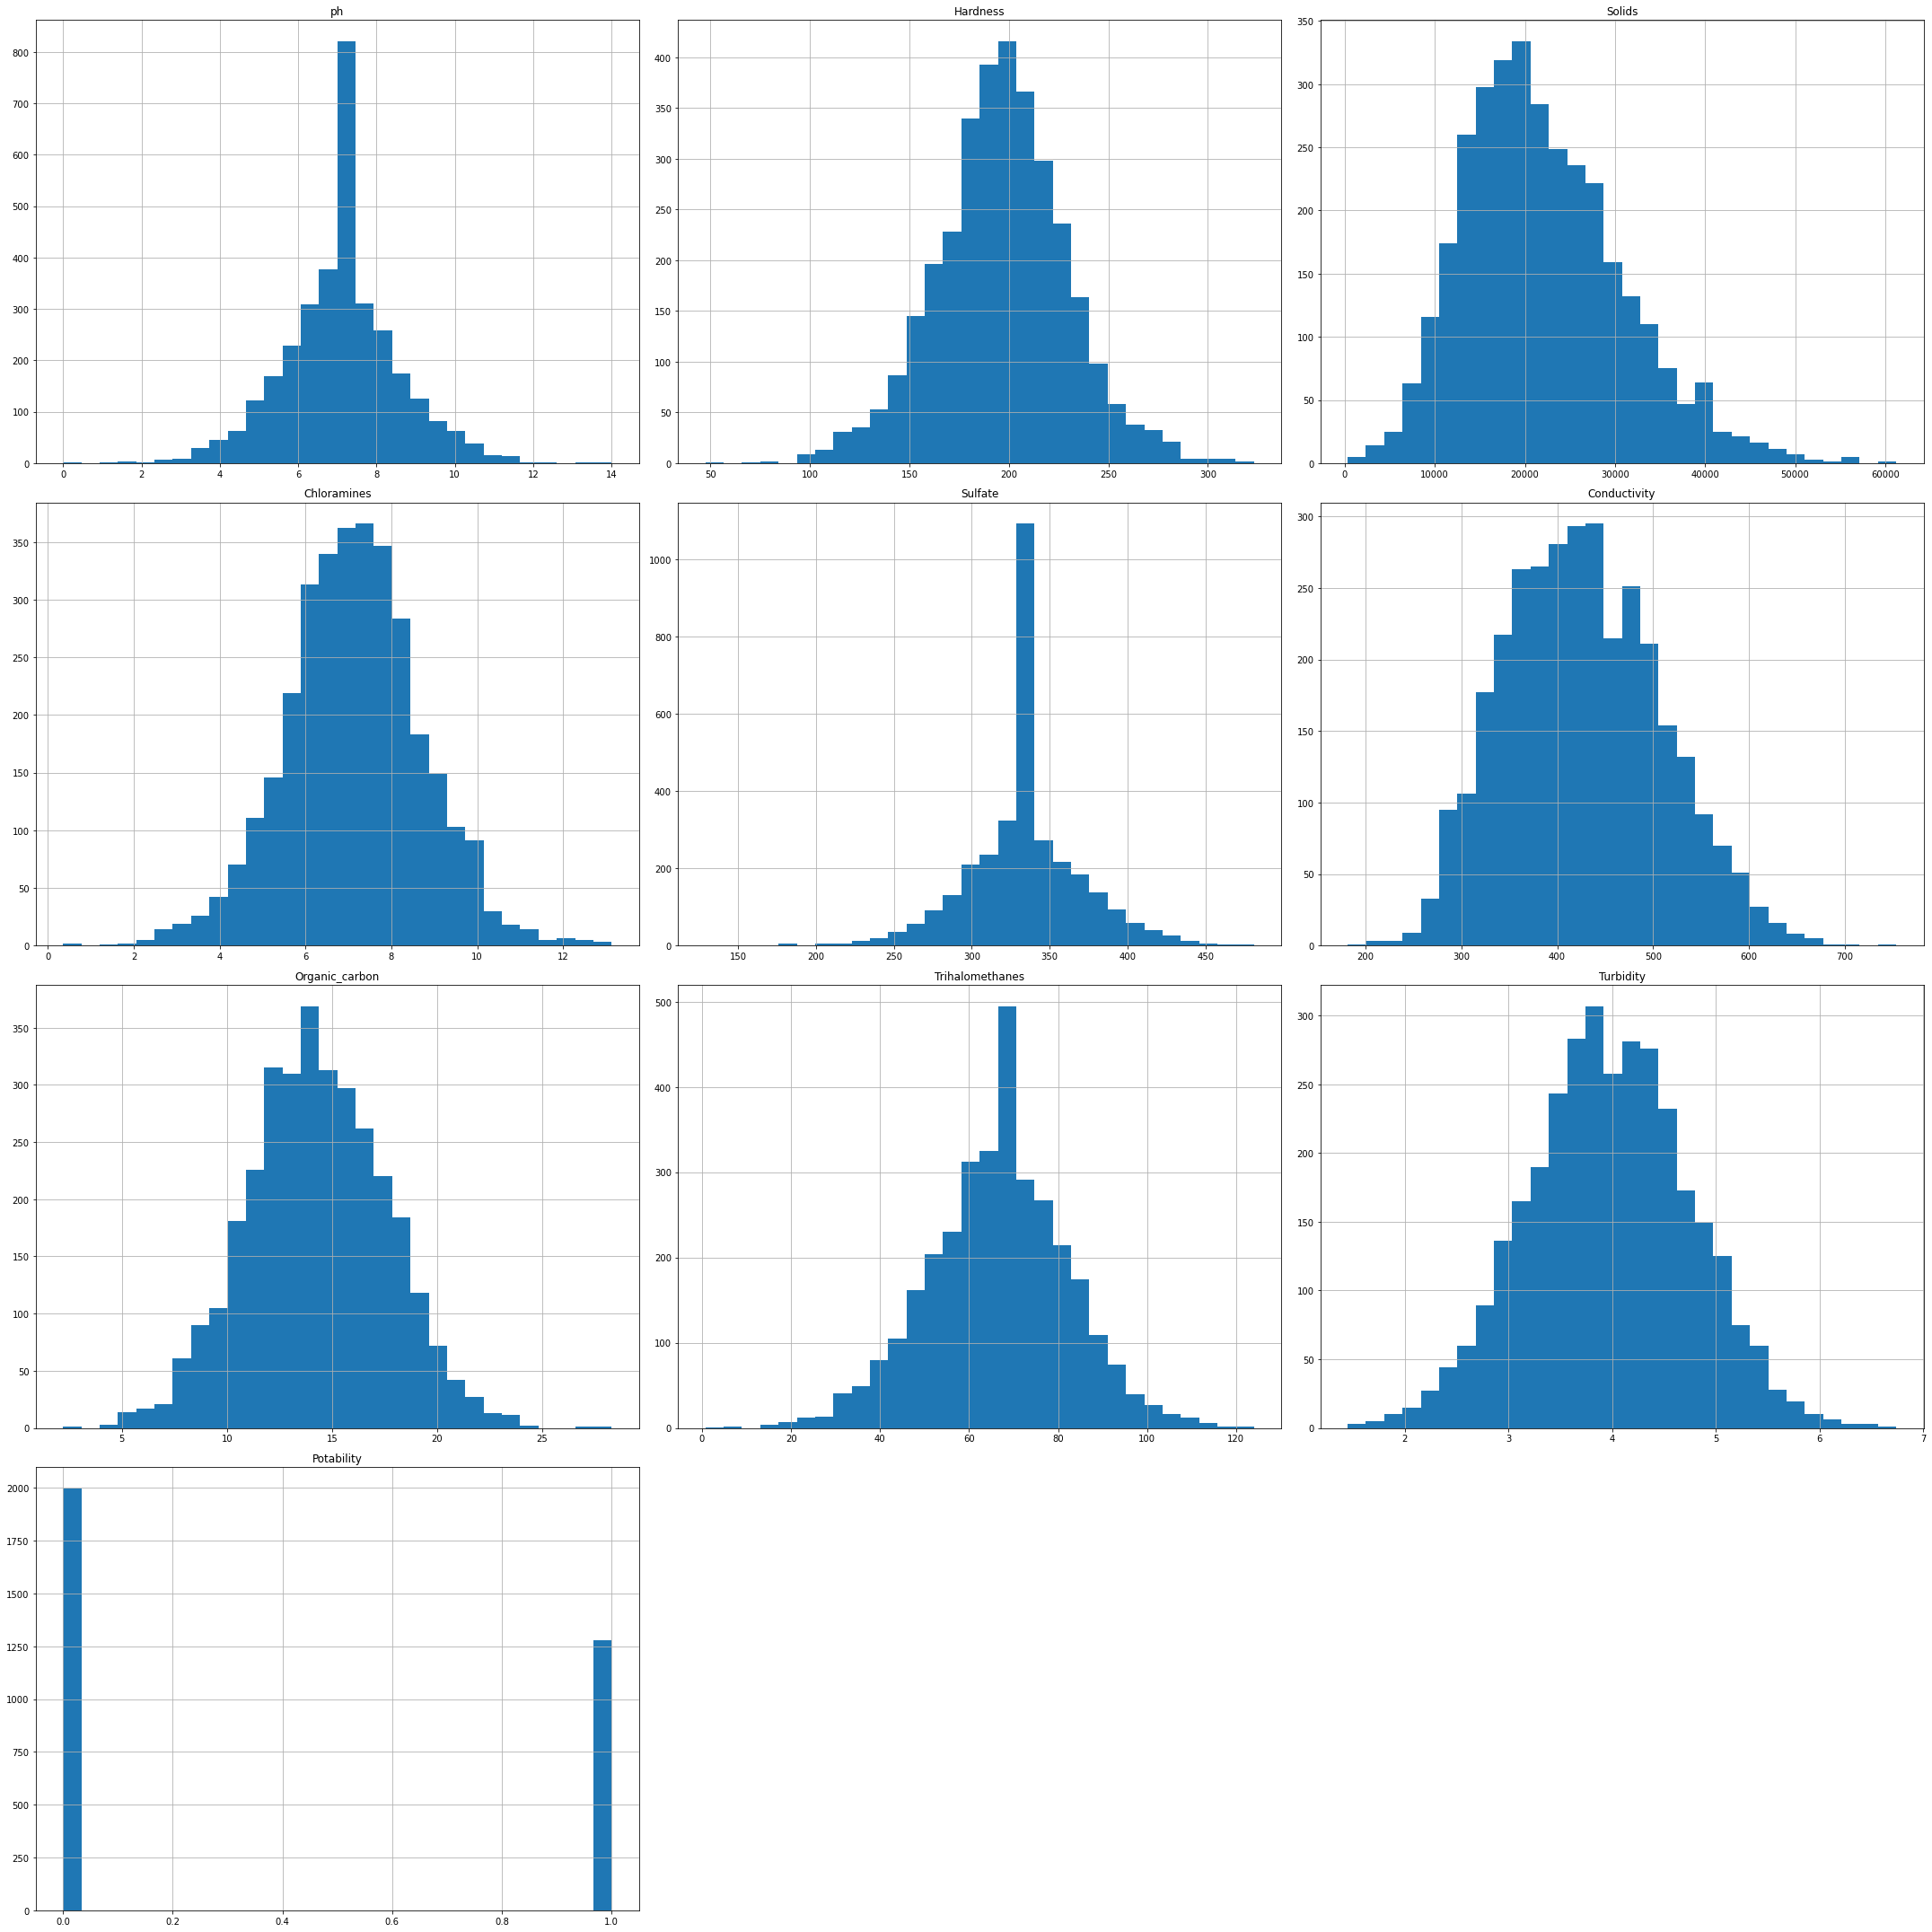

In [34]:
plt.figure(figsize=(30, 30))  
df.hist(figsize=(30, 30), bins=30)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

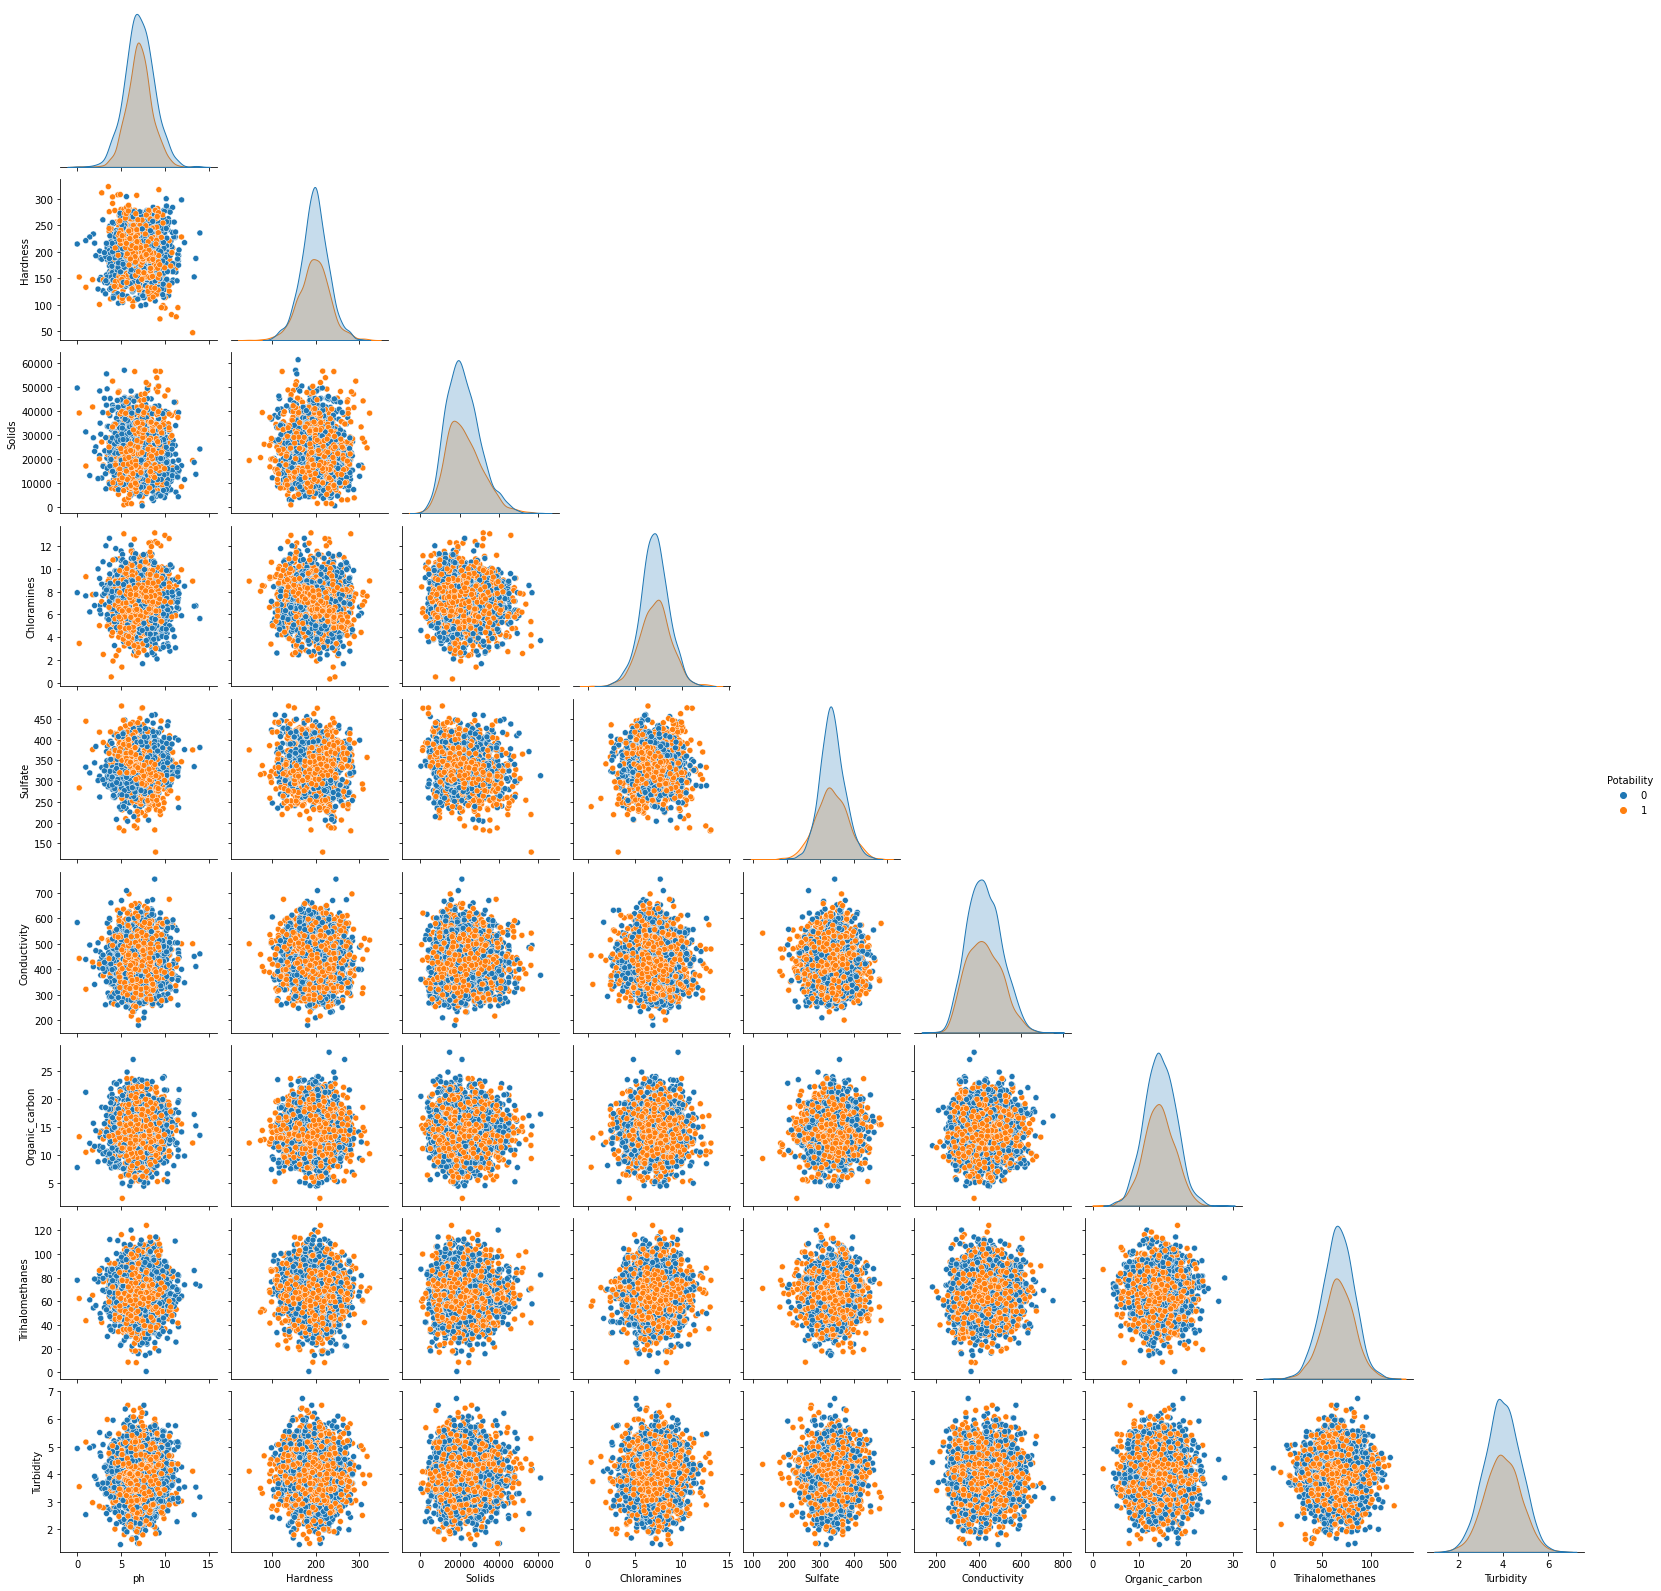

In [16]:
plt.figure(figsize=(20,10))
sns.pairplot(df,hue='Potability',corner=True)
plt.show()

In [17]:
df.skew().sort_values(ascending=False)

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.025630
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Sulfate           -0.035947
Hardness          -0.039342
Trihalomethanes   -0.083031
dtype: float64

In [18]:
print('Percentageof nulls for each columns \n')
print(round(df.isnull().sum() / len(df) * 100, 2))

Percentageof nulls for each columns 

ph                 14.99
Hardness            0.00
Solids              0.00
Chloramines         0.00
Sulfate            23.84
Conductivity        0.00
Organic_carbon      0.00
Trihalomethanes     4.95
Turbidity           0.00
Potability          0.00
dtype: float64


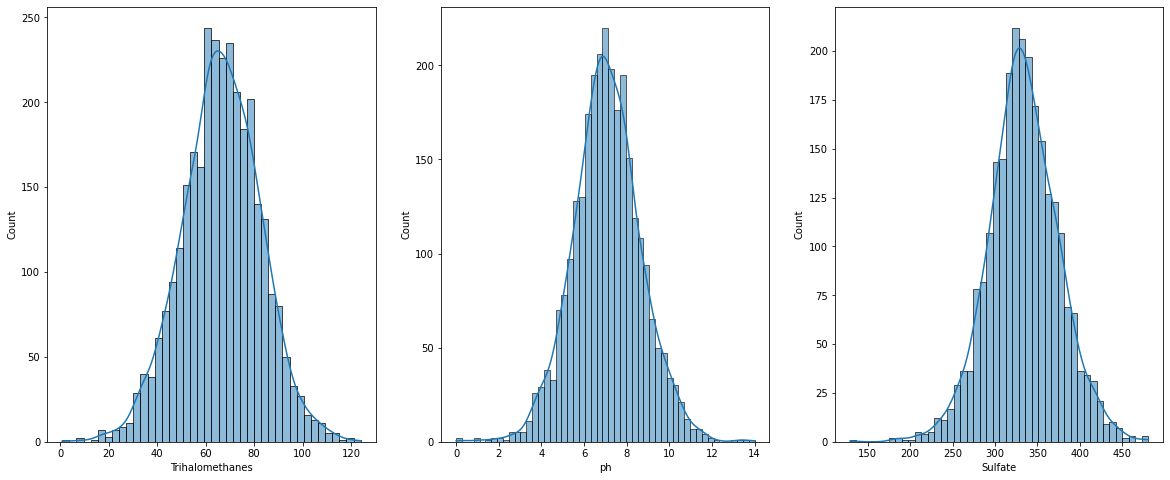

In [19]:
fig=plt.figure(figsize=(20, 8))
ax = fig.subplots(ncols=3, nrows=1)
ax = ax.flatten()
x=['Trihalomethanes','ph','Sulfate']
index = 0
for i in x:
    sns.histplot(x=i, data=df, ax=ax[index],kde=True)
    index = index + 1
plt.show()

In [20]:
df['ph'] = df['ph'].fillna(value=df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(value=df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median())

In [21]:
print('Percentageof nulls for each columns \n')
print(round(df.isnull().sum() / len(df) * 100, 2))

Percentageof nulls for each columns 

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64


In [22]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [23]:
X.shape, y.shape

((3276, 9), (3276,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19, test_size=0.2)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled_df.head())
print(X_test_scaled_df.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.027693  1.247417  0.461089    -0.037127  1.057259     -0.998971   
1 -0.619848 -1.242443  0.452925     0.652169 -0.973733      1.317091   
2 -0.658367 -1.097249 -0.925680     0.259359  0.895902      0.293219   
3  0.476272 -0.662776 -0.980883     0.243549 -0.021639      0.802862   
4 -0.081109  0.538647 -0.797483    -0.086117 -0.137775      0.521812   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.061876         0.399468  -0.350169  
1        0.035906         0.109317   1.021662  
2        1.358411        -0.127233  -2.325848  
3       -0.124910         0.549328   1.195095  
4        0.959936         2.397707   1.178891  
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.034136 -0.345425  1.030781     0.929083 -0.174790     -1.226238   
1  0.421929  1.154887  0.009021     0.627639 -0.021639     -0.352366   
2 -0.329892  1.468464  0.219696    -0.223028 -1.641262     -1.1

# MODELS

- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost
- KNeighbours
- SVM
- adaboost

In [55]:
model_names = ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "XGBoost",
               "K-Neighbors",
               "SVM",
               "AdaBoost"]



model_instances = [LogisticRegression(),
                   DecisionTreeClassifier(),
                   RandomForestClassifier(),
                   XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                   KNeighborsClassifier(),
                   SVC(),
                   AdaBoostClassifier()]

model_accuracies = {}

for i in range(len(model_names)):
    name = model_names[i]
    model = model_instances[i]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(name + ":")
    print("Accuracy: {:.2f}".format(accuracy))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Logistic Regression:
Accuracy: 0.61
Confusion Matrix:
[[402   1]
 [253   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       403
           1       0.00      0.00      0.00       253

    accuracy                           0.61       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.38      0.61      0.47       656

------------------------------------------------------------
Decision Tree:
Accuracy: 0.58
Confusion Matrix:
[[270 133]
 [140 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       403
           1       0.46      0.45      0.45       253

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656

------------------------------------------------------------
Random Forest:
Accuracy: 0.69


In [56]:
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.2f}")


Best Model: Random Forest with Accuracy: 0.69


In [ ]:
# we will go with randomforestclassifier 

In [69]:
param_dist = {
    'n_estimators': randint(200, 300),  
    'max_features': [ 'sqrt','log2'],  
    'max_depth': randint(20, 30), 
    'min_samples_split': randint(2, 5),  
    'min_samples_leaf': randint(1, 2),  
    'bootstrap': [True, False]  
}


In [72]:

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=19)

random_search.fit(X_train_scaled, y_train)

best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print('best_rf_model',best_rf_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'bootstrap': True, 'max_depth': 23, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 284}
best_rf_model RandomForestClassifier(max_depth=23, max_features='log2', min_samples_split=3,
                       n_estimators=284)


In [74]:
y_pred_best_rf = best_rf_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_best_rf)
print("Tuned Random Forest Accuracy: {:.2f}".format(accuracy))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

Tuned Random Forest Accuracy: 0.69
Confusion Matrix:
[[367  36]
 [169  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       403
           1       0.70      0.33      0.45       253

    accuracy                           0.69       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.69      0.65       656



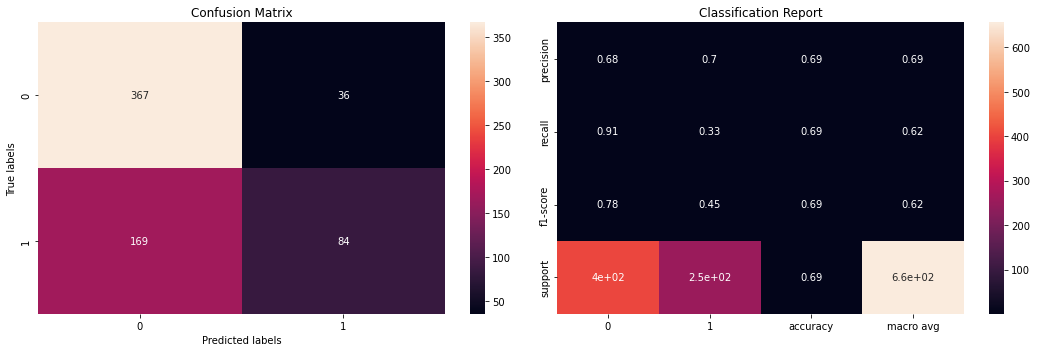

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
class_report = classification_report(y_test, y_pred_best_rf, output_dict=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

report_df = pd.DataFrame(class_report).T
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, ax=ax[1])
ax[1].set_title('Classification Report')


plt.tight_layout()

plt.show()